Decision Trees

Step 1: Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import  classification_report, confusion_matrix

Step 2: Load the dataset

In [17]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 3: Feature Engineering

In [19]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

#Handiling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

#Encode categorical
data["Sex"] = data["Sex"].map({"male":0, "female":1})
data["Embarked"] = data["Embarked"].map({'S':0, 'C':1,'Q':2})

C:\Users\admin\AppData\Local\Temp\ipykernel_22712\617961754.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_22712\617961754.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Step 4: Training the data


In [20]:
X = data[features]
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

Step 4: Train two decision trees

In [22]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Step 5: Predictions

In [23]:
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

Step 6: Compare results


In [24]:
print("Gini Classification Report:\n")
print(classification_report(y_test,y_pred_gini))

print("Entropy Classifiaction Report:\n")
print(classification_report(y_test,y_pred_entropy))

Gini Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.96      0.80       105
           1       0.87      0.36      0.51        74

    accuracy                           0.72       179
   macro avg       0.78      0.66      0.66       179
weighted avg       0.76      0.72      0.68       179

Entropy Classifiaction Report:

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       105
           1       0.82      0.36      0.50        74

    accuracy                           0.70       179
   macro avg       0.75      0.65      0.65       179
weighted avg       0.74      0.70      0.67       179



Step 7: Confusion Matrix

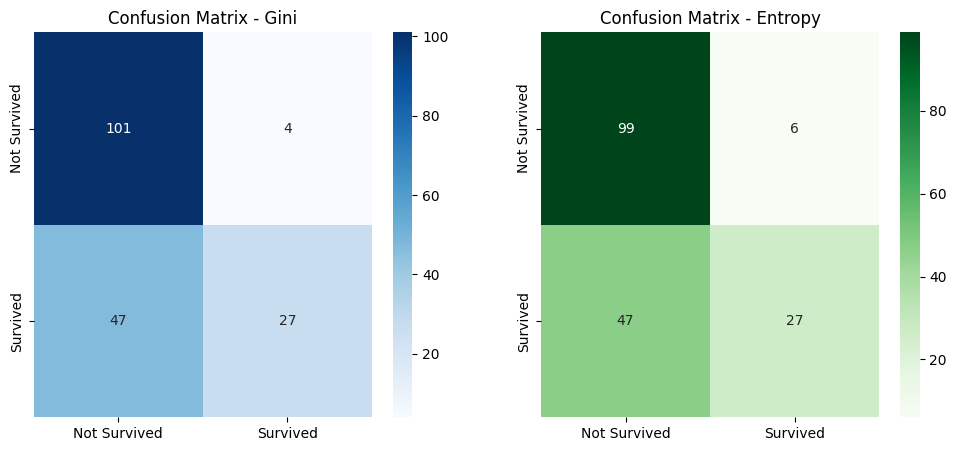

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test,y_pred_gini), annot = True, fmt ='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"], ax=axes[0])
axes[0].set_title("Confusion Matrix - Gini")

sns.heatmap(confusion_matrix(y_test,y_pred_entropy), annot = True, fmt = 'd', cmap='Greens',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"], ax=axes[1])
axes[1].set_title("Confusion Matrix - Entropy")

plt.show()

Step 8: Feature Importance

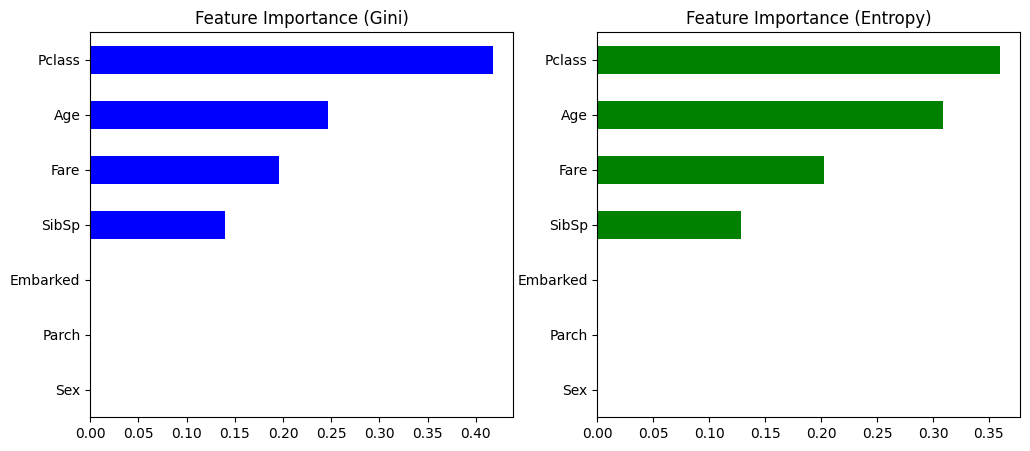

In [29]:
importances_gini = pd.Series(dt_gini.feature_importances_, index=features)
importances_entropy = pd.Series(dt_entropy.feature_importances_,index=features)

fig,axes = plt.subplots(1,2,figsize=(12,5))
importances_gini.sort_values().plot(kind='barh', ax = axes[0], color='blue')
axes[0].set_title('Feature Importance (Gini)')

importances_entropy.sort_values().plot(kind="barh",ax = axes[1], color='green')
axes[1].set_title("Feature Importance (Entropy)")

plt.show()

Step 9 : Visualize the trees

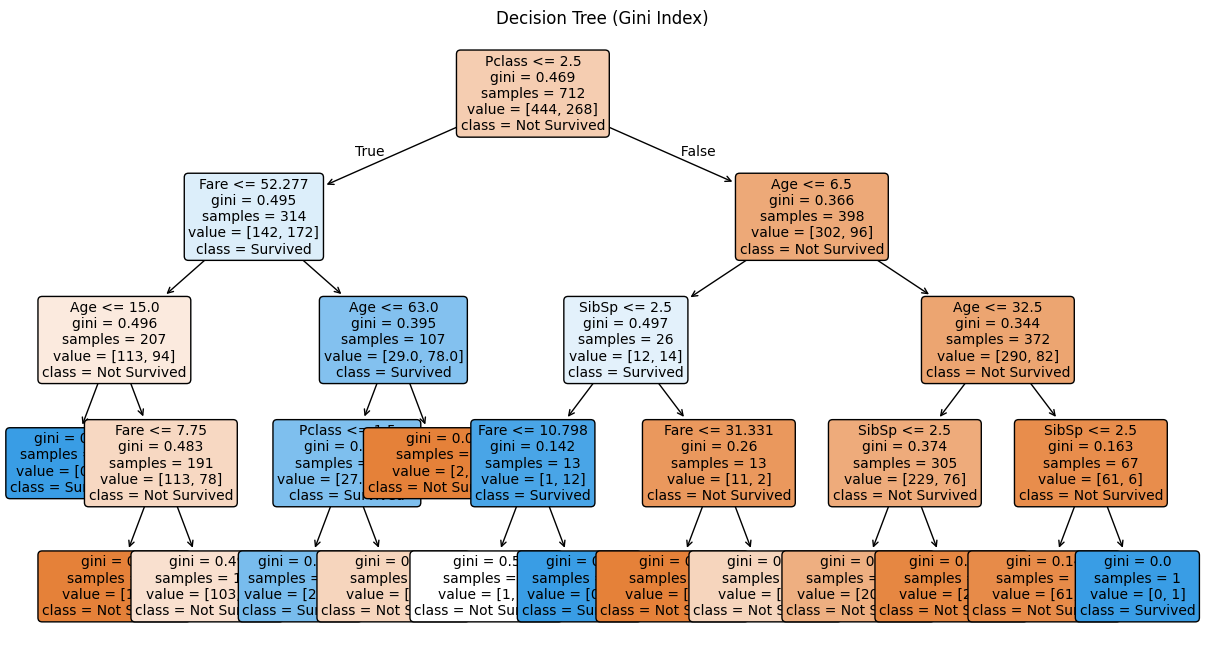

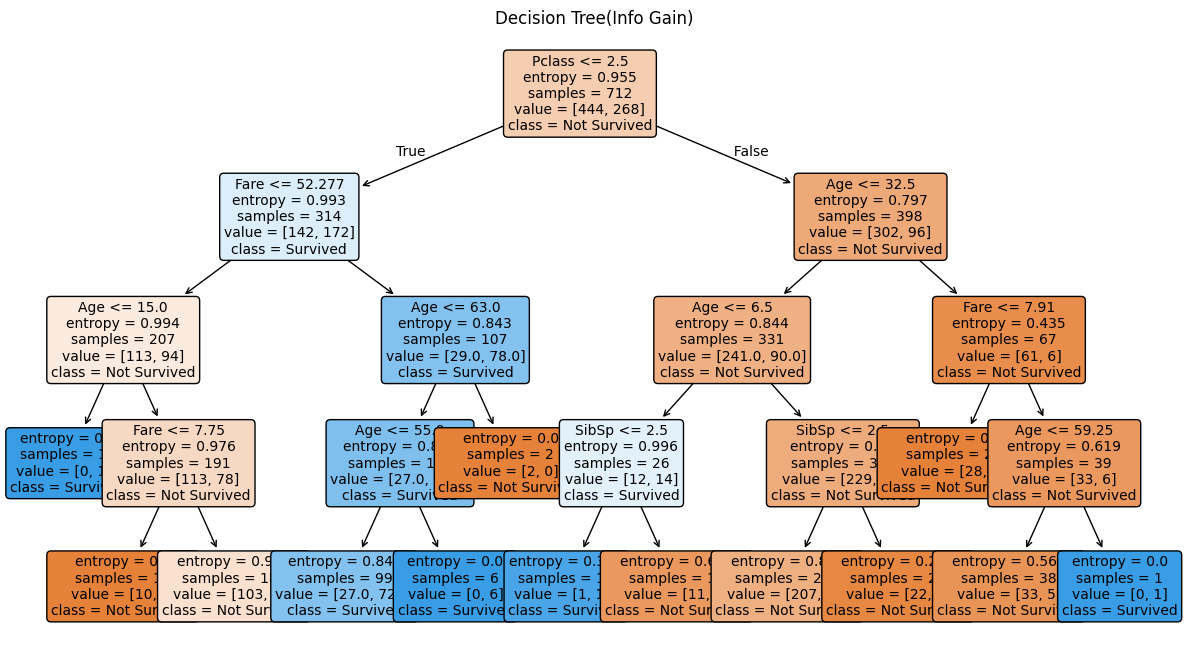

In [32]:
plt.figure(figsize=(15,8))
plot_tree(dt_gini, feature_names = features, class_names=["Not Survived", "Survived"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (Gini Index)")
plt.show()

plt.figure(figsize=(15,8))
plot_tree(dt_entropy, feature_names = features, class_names=["Not Survived", "Survived"],
          filled=True, rounded=True,fontsize=10)
plt.title("Decision Tree(Info Gain)")
plt.show()